### Implementing Equation 18.5 (Part 1)

The goal of a Decision Tree is to find feature $j_i$ and threshold $t_i$ that minimizes the weighted sum of the cost of Left Subtree $c(D^L_i(j,t))$ and Right Subtree $c(D^R_i(j,t))$

Or more precisely
> $(j_i, t_i) = \arg \min_{j \in \{1,..,D\}} \min_{t \in T_j} \frac{|D^L_i (j,t)|}{|D_i|} c(D^L_i(j,t)) + \frac{|D^R_i (j,t)|}{|D_i|} c(D^R_i(j,t))$

In this notebook, we attempted first in finding the minimum threshold

> $t_i = \arg \min_{t \in T_j} \frac{|D^L_i (j,t)|}{|D_i|} c(D^L_i(j,t)) + \frac{|D^R_i (j,t)|}{|D_i|} c(D^R_i(j,t))$


### For Further Investigation
- The threshold for $t$ that we got here is $t=0$. Also, the feature we searched upon are distributed as Gaussian. Maybe we can compare the distribution of all features vs there thresholds on the **Part 2** of the implementation


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes

/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_4586/2078815089.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


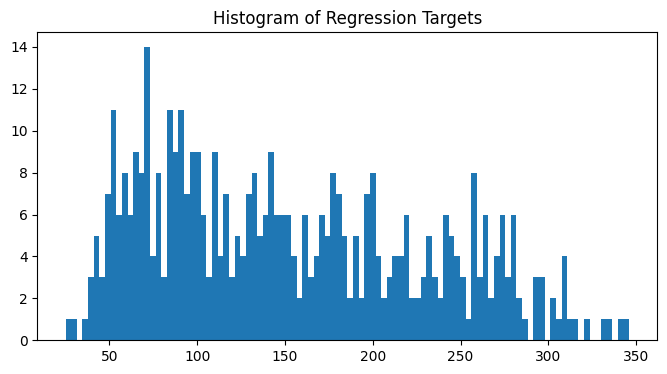

In [4]:
data = load_diabetes()
X,y = data['data'], data['target']

plt_figsize = (8,4)
plt.figure(figsize=plt_figsize)
plt.hist(y, bins=100)
plt.title('Histogram of Regression Targets')
plt.show()

In [28]:
feature_index = 3

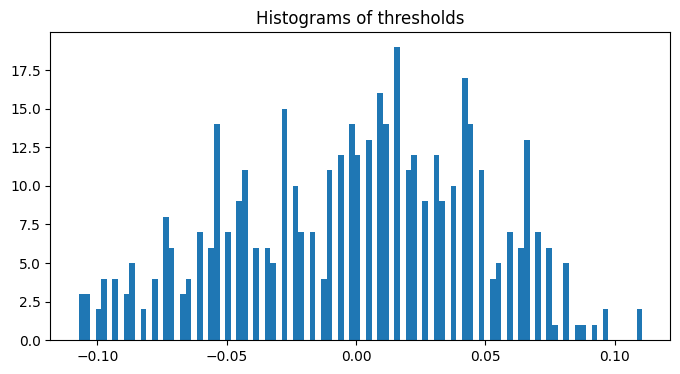

In [29]:
thresh = np.unique(X[:,feature_index])

plt.figure(figsize=plt_figsize)
plt.hist(X[:,0].reshape(-1), bins=100)
plt.title('Histograms of thresholds')
plt.show()

/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_4586/3277950944.py:15: RuntimeWarning: invalid value encountered in divide
  left_samples_mean = np.where(n_samples_left == 0, 0, left_samples_sum / n_samples_left)
/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_4586/3277950944.py:16: RuntimeWarning: invalid value encountered in divide
  right_samples_mean = np.where(n_samples_right == 0, 0, right_samples_sum / n_samples_right)


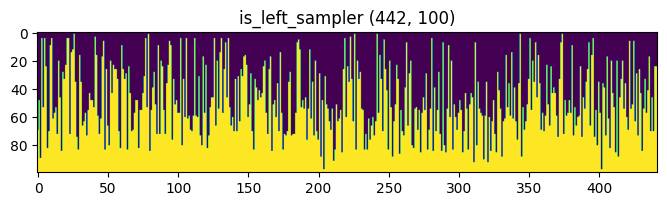

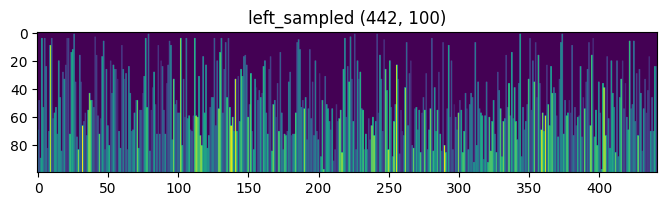

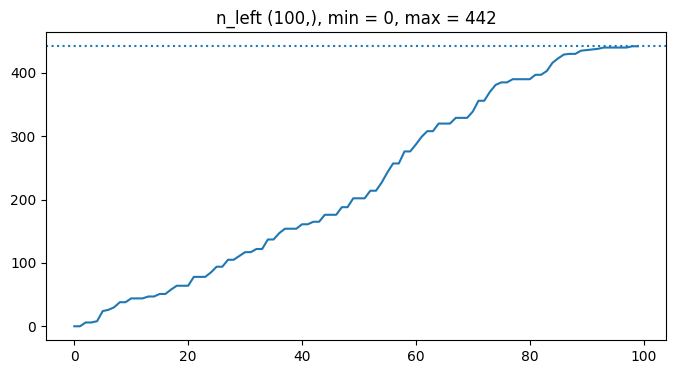

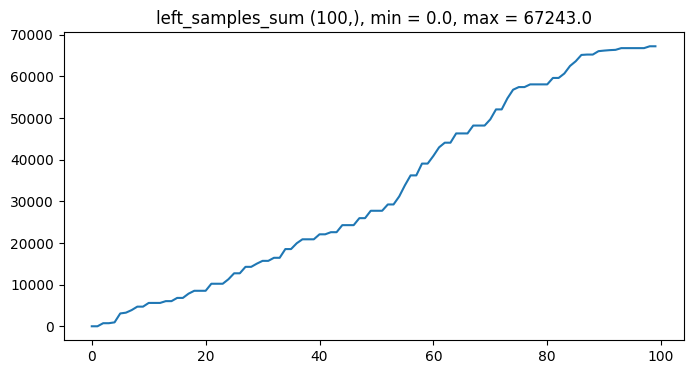

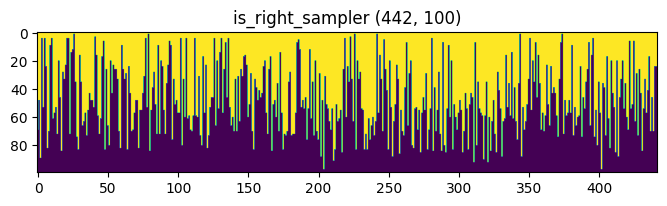

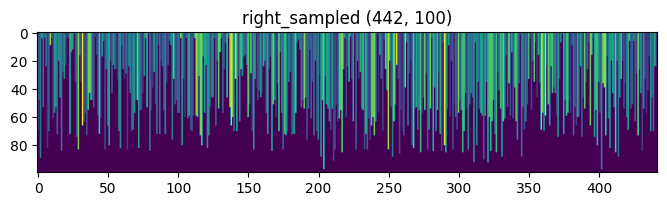

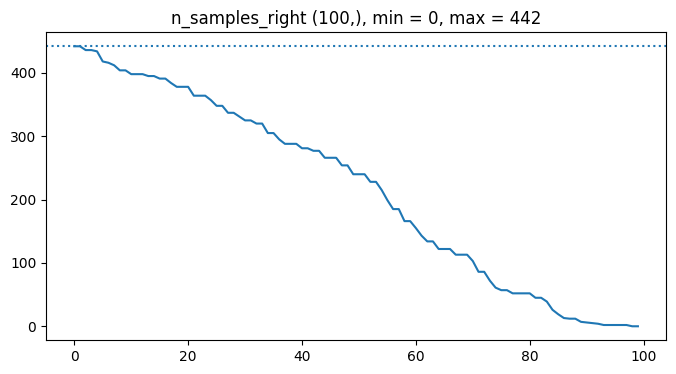

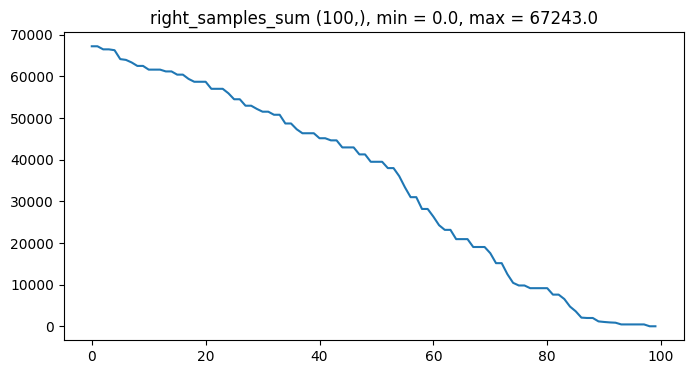

In [30]:
thresh = np.unique(X[:,feature_index]).reshape(1,-1)
selected_feat = X[:,0].reshape(-1,1)
is_left_sampler = (selected_feat <= thresh)
is_right_sampler = ~(is_left_sampler)
stacked_targets = np.hstack([y.reshape(-1,1)] * is_left_sampler.shape[1])
left_sampled = is_left_sampler * stacked_targets
right_sampled = is_right_sampler * stacked_targets

n_samples_left = np.sum(is_left_sampler, axis=0)
n_samples_right = np.sum(is_right_sampler, axis=0)

left_samples_sum = np.sum(left_sampled, axis=0)
right_samples_sum = np.sum(right_sampled, axis=0)

left_samples_mean = np.where(n_samples_left == 0, 0, left_samples_sum / n_samples_left)
right_samples_mean = np.where(n_samples_right == 0, 0, right_samples_sum / n_samples_right)

# Plot for left
plt.figure(figsize=plt_figsize)
plt.imshow(is_left_sampler.T)
plt.title(f'is_left_sampler {is_left_sampler.shape}')
plt.show()

plt.figure(figsize=plt_figsize)
plt.imshow(left_sampled.T)
plt.title(f'left_sampled {left_sampled.shape}')
plt.show()

plt.figure(figsize=plt_figsize)
plt.plot(np.arange(n_samples_left.shape[0]), n_samples_left)
plt.axhline(np.max(n_samples_left), linestyle='dotted')
plt.title(f'n_left {n_samples_left.shape}, min = {np.min(n_samples_left)}, max = {np.max(n_samples_left)}')
plt.show()

plt.figure(figsize=plt_figsize)
plt.plot(np.arange(left_samples_sum.shape[0]), left_samples_sum)
plt.title(f'left_samples_sum {left_samples_sum.shape}, min = {np.min(left_samples_sum)}, max = {np.max(left_samples_sum)}')
plt.show()

# Plot for right
plt.figure(figsize=plt_figsize)
plt.imshow(is_right_sampler.T)
plt.title(f'is_right_sampler {is_right_sampler.shape}')
plt.show()

plt.figure(figsize=plt_figsize)
plt.imshow(right_sampled.T)
plt.title(f'right_sampled {right_sampled.shape}')
plt.show()

plt.figure(figsize=plt_figsize)
plt.plot(np.arange(n_samples_right.shape[0]), n_samples_right)
plt.axhline(np.max(n_samples_right), linestyle='dotted')
plt.title(f'n_samples_right {n_samples_right.shape}, min = {np.min(n_samples_right)}, max = {np.max(n_samples_right)}')
plt.show()

plt.figure(figsize=plt_figsize)
plt.plot(np.arange(right_samples_sum.shape[0]), right_samples_sum)
plt.title(f'right_samples_sum {right_samples_sum.shape}, min = {np.min(right_samples_sum)}, max = {np.max(right_samples_sum)}')
plt.show()


/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_4586/609852273.py:10: RuntimeWarning: invalid value encountered in divide
  var_left = np.where(n_samples_left == 0, 0, np.sum(var_left, axis=0) / n_samples_left)
/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_4586/609852273.py:11: RuntimeWarning: invalid value encountered in divide
  var_right = np.where(n_samples_right == 0, 0, np.sum(var_right, axis=0) / n_samples_right)


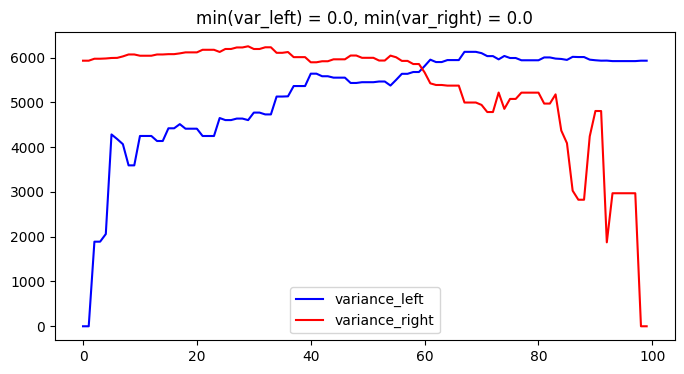

In [31]:
# Variance calculations
var_left = (left_sampled - left_samples_mean.reshape(1,-1)) ** 2
var_right = (right_sampled - right_samples_mean.reshape(1,-1)) ** 2

# This is important. We will be computing the wrong variance without this
var_left = np.where(left_sampled == 0, 0, var_left)
var_right = np.where(right_sampled == 0, 0, var_right)

# var_left.shape
var_left = np.where(n_samples_left == 0, 0, np.sum(var_left, axis=0) / n_samples_left)
var_right = np.where(n_samples_right == 0, 0, np.sum(var_right, axis=0) / n_samples_right)

min_var_left = np.min(var_left)
min_var_right = np.min(var_right)
min_var_left = round(float(min_var_left), 2)
min_var_right = round(float(min_var_right), 2)

plt.figure(figsize=plt_figsize)
plt.plot(np.arange(var_left.shape[0]), var_left, color='blue', label='variance_left')
plt.plot(np.arange(var_right.shape[0]), var_right, color='red', label='variance_right')
plt.legend()
plt.title(f'min(var_left) = {min_var_left}, min(var_right) = {min_var_right}')
plt.show()

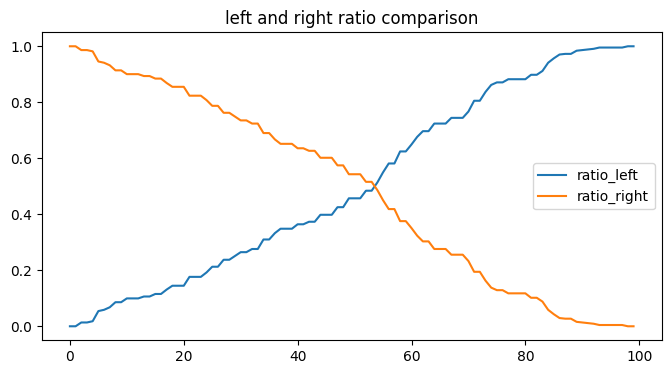

In [32]:
total_samples = left_sampled.shape[0]
assert total_samples == right_sampled.shape[0], 'wrong total samples'

ratio_left = n_samples_left / total_samples
ratio_right = n_samples_right / total_samples

plt.figure(figsize=plt_figsize)
plt.plot(np.arange(ratio_left.shape[0]), ratio_left, label='ratio_left')
plt.plot(np.arange(ratio_right.shape[0]), ratio_right, label='ratio_right')
plt.legend()
plt.title('left and right ratio comparison')
plt.show()

In [33]:
print('var_left.shape = ', var_left.shape)
print('ratio_left.shape = ', ratio_left.shape)

print('var_right.shape = ', var_right.shape)
print('ratio_right.shape = ', ratio_right.shape)

var_left.shape =  (100,)
ratio_left.shape =  (100,)
var_right.shape =  (100,)
ratio_right.shape =  (100,)


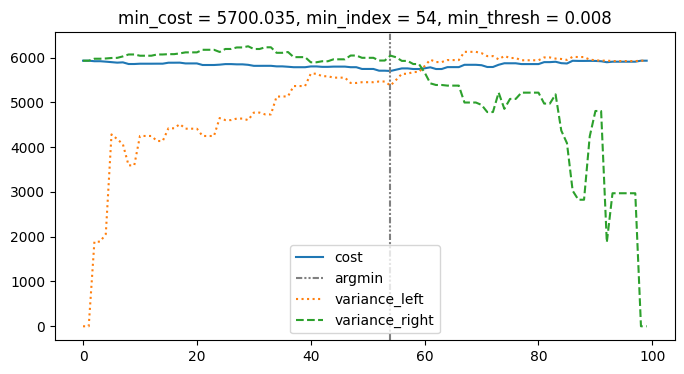

In [34]:
### This is what we want to minimize
thresh_cost = ratio_left * var_left + ratio_right * var_right
min_index = np.argmin(thresh_cost)

min_cost = np.min(thresh_cost)
min_cost = float(min_cost)
min_cost = round(min_cost, 3)

min_thresh = thresh.reshape(-1)[min_index]
min_thresh = float(min_thresh)
min_thresh = round(min_thresh, 3)  

plt.figure(figsize=plt_figsize)
plt.plot(np.arange(thresh_cost.shape[0]), thresh_cost, label='cost')
plt.axvline(min_index, color='gray', label='argmin', linestyle=(0, (3, 1, 1, 1, 1, 1)))
plt.plot(np.arange(var_left.shape[0]), var_left, label='variance_left', linestyle='dotted')
plt.plot(np.arange(var_right.shape[0]), var_right, label='variance_right', linestyle='dashed')
plt.legend()
plt.title(f'min_cost = {min_cost}, min_index = {min_index}, min_thresh = {min_thresh}')
plt.show()

In [35]:
def split_by_min_thresh(X, feat_index):
    thresh = np.unique(X[:,feat_index]).reshape(1,-1)
    selected_feat = X[:,feat_index].reshape(-1,1)
    is_left_sampler = (selected_feat <= thresh)
    is_right_sampler = ~(is_left_sampler)
    stacked_targets = np.hstack([y.reshape(-1,1)] * is_left_sampler.shape[1])
    left_sampled, right_sampled = is_left_sampler * stacked_targets, is_right_sampler * stacked_targets

    n_samples_left, n_samples_right = np.sum(is_left_sampler, axis=0), np.sum(is_right_sampler, axis=0)
    left_samples_sum, right_samples_sum = np.sum(left_sampled, axis=0), np.sum(right_sampled, axis=0)

    with np.errstate(divide='ignore', invalid='ignore'):
        left_samples_mean = np.where(n_samples_left == 0, 0, left_samples_sum / n_samples_left)
        right_samples_mean = np.where(n_samples_right == 0, 0, right_samples_sum / n_samples_right)
    
    var_left = (left_sampled - left_samples_mean.reshape(1,-1)) ** 2
    var_right = (right_sampled - right_samples_mean.reshape(1,-1)) ** 2

    # This is important. We will be computing the wrong variance without this
    var_left = np.where(left_sampled == 0, 0, var_left)
    var_right = np.where(right_sampled == 0, 0, var_right)

    with np.errstate(divide='ignore', invalid='ignore'):
        var_left = np.where(n_samples_left == 0, 0, np.sum(var_left, axis=0) / n_samples_left)
        var_right = np.where(n_samples_right == 0, 0, np.sum(var_right, axis=0) / n_samples_right)

    total_samples = left_sampled.shape[0]
    assert total_samples == right_sampled.shape[0], 'wrong total samples'

    ratio_left, ratio_right = n_samples_left / total_samples, n_samples_right / total_samples
    thresh_cost = ratio_left * var_left + ratio_right * var_right
    min_index = np.argmin(thresh_cost)

    min_cost = np.min(thresh_cost)
    min_thresh = thresh.reshape(-1)[min_index]

    return min_cost, min_thresh



In [37]:
split_by_min_thresh(X, feature_index)

(4919.231731635831, 0.0218723855140367)